 # <center>  LAB6 - Kwadratury </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 

## Zadanie 1
Wiadomo, że:
$$ \int_0^1 \frac{4}{1 + x^2} \, dx = \pi $$
Powyższą równość można wykorzystać do obliczenia przybliżonej wartości π poprzez całkowanie numeryczne.

(a) Obliczenia
Oblicz wartość powyższej całki, korzystając ze złożonych kwadratur otwartej prostokątów (ang. mid-point rule), trapezów i Simpsona. Można wykorzystać funkcje integrate.trapz i integrate.simps z biblioteki scipy. Na przedziale całkowania rozmieść 2m+1 równoodległych węzłów. W kolejnych próbach m wzrasta o 1, tzn. między każde dwa sąsiednie węzły dodawany jest nowy węzeł, a ich zagęszczenie zwiększa się dwukrotnie. Przyjmij zakres wartości m od 1 do 25.

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, n + 1 (gdzie n = 1/h, z krokiem h). Wyniki przedstaw na wspólnym wykresie, używając skali logarytmicznej na obu osiach.

(b) Analiza Kroku h
Czy istnieje pewna wartość, poniżej której zmniejszanie kroku h nie zmniejsza już błędu kwadratury? Porównaj wartość hmin, odpowiadającą minimum wartości bezwzględnej błędu względnego, z wartością wyznaczoną w laboratorium 1.

(c) Rząd Zbieżności
Dla każdej z użytych metod porównaj empiryczny rząd zbieżności z rząd zbieżności przewidywanym przez teorię. Aby wyniki miały sens, do obliczenia rzędu empirycznego użyj wartości h z zakresu, w którym błąd metody przeważa nad błędem numerycznym.

## Zadanie 2
Oblicz wartość całki:

$$ \int_0^1 \frac{4}{1 + x^2} \, dx \quad $$



metodą Gaussa-Legendre’a. Narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, n + 1. Przyjmij na tyle duży zakres n, aby wykryć, kiedy błąd numeryczny zaczyna przeważać nad błędem metody. Postaraj się umiejscowić otrzymane wyniki na wykresie stworzonym w podpunkcie (a).



In [1]:
import numpy as np
from scipy.integrate import trapezoid, simpson
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.special import roots_legendre
from scipy.stats import linregress


# Zadanie 1

In [2]:
def f(x):
    return 4 / (1 + x**2)

def mid_point_rule(y, x):
    midpoints = (x[:-1] + x[1:]) / 2
    widths = x[1:] - x[:-1]
    return np.sum(f(midpoints) * widths)  
    
def calculate_integral_error(method, m):
    errors = []
    for i in range(1, m+1):
        n = 2**i + 1
        x = np.linspace(0, 1, n)
        y = f(x)
        integral = method(y, x=x)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
    return errors

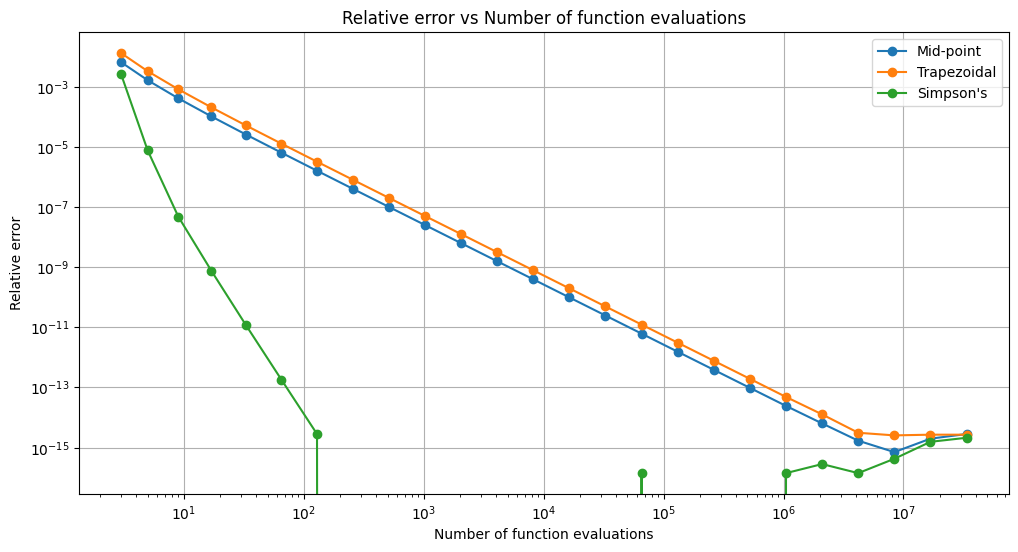

In [3]:
m_values = 2**np.arange(1, 26) + 1
errors_midpoint = calculate_integral_error(mid_point_rule, 25)
errors_trapezoidal = calculate_integral_error(trapezoid, 25)
errors_simpson = calculate_integral_error(simpson, 25)

plt.figure(figsize=(12, 6))
plt.plot(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.plot(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.plot(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 2

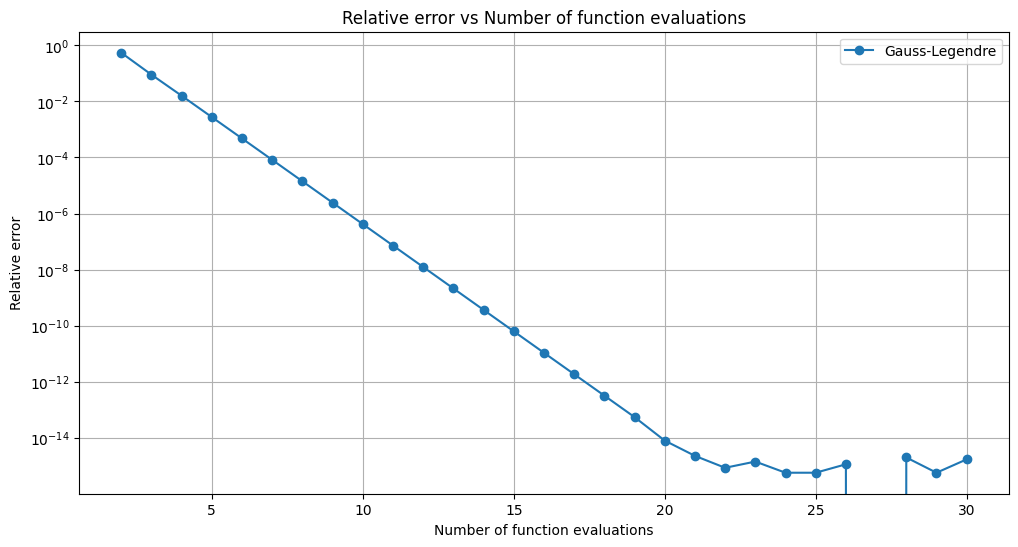

In [4]:
def gauss_legendre_integration(n):
    x, w = roots_legendre(n)
    integral = np.sum(w * f(x))
    return integral - np.pi

def calculate_integral_error_gauss_legendre(n_values):
    errors = []
    for n in n_values:
        integral = gauss_legendre_integration(n)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
    return errors

n_values = np.arange(1, 30)

errors_gauss_legendre = calculate_integral_error_gauss_legendre(n_values)

plt.figure(figsize=(12, 6))
plt.plot(n_values + 1, errors_gauss_legendre, label='Gauss-Legendre', marker='o')

plt.yscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

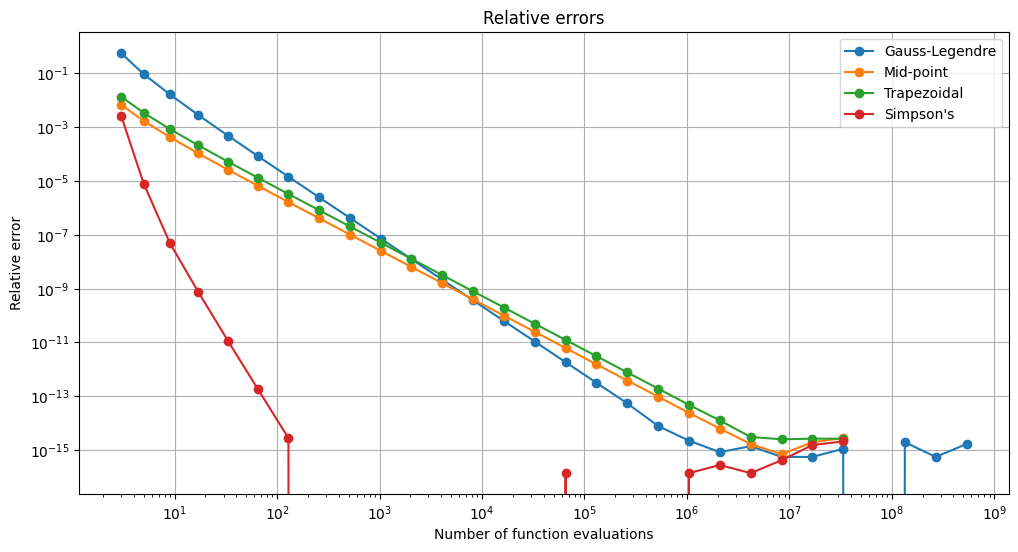

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(2**(n_values) + 1, errors_gauss_legendre, label='Gauss-Legendre', marker='o')
plt.plot(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.plot(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.plot(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative errors')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def calculate_integral_error_and_evaluations(method, a, b, m_max):
    errors = []
    evaluations = []
    for i in range(1, m_max + 1):
        m = i
        n_evals = 2 * m + 1
        x = np.linspace(a, b, n_evals)
        y = f(x)
        integral = method(y, x=x)
        error = np.abs(np.pi - integral) / np.pi
        errors.append(error)
        evaluations.append(n_evals)
    return evaluations, errors

a = 0
b = 1
m_max = 25

evaluations_midpoint, errors_midpoint = calculate_integral_error_and_evaluations(mid_point_rule, a, b, m_max)
evaluations_trapezoidal, errors_trapezoidal = calculate_integral_error_and_evaluations(trapezoid, a, b, m_max)
evaluations_simpson, errors_simpson = calculate_integral_error_and_evaluations(simpson, a, b, m_max)

In [7]:
def calculate_convergence_order(evaluations, errors):
    log_evals = np.log(evaluations)
    log_errors = np.log(errors)
    slope, _, _, _, _ = linregress(log_evals, log_errors)
    return -slope  # Zwracamy -slope, ponieważ błąd zmniejsza się

order_midpoint = calculate_convergence_order(evaluations_midpoint, errors_midpoint)
order_trapezoidal = calculate_convergence_order(evaluations_trapezoidal, errors_trapezoidal)
order_simpson = calculate_convergence_order(evaluations_simpson, errors_simpson)

print(f'Mid-point (Order: {order_midpoint:.2f})')
print(f'Trapezoidal (Order: {order_trapezoidal:.2f})')
print(f'Simpson\'s (Order: {order_simpson:.2f})')

Mid-point (Order: 2.20)
Trapezoidal (Order: 2.20)
Simpson's (Order: 7.07)


In [8]:
def find_hmin(evaluations, errors):
    # Znalezienie punktu, w którym zmiana błędu staje się niewielka
    h_values = 1 / (np.array(evaluations) - 1)  # h = 1/n, n = evaluations - 1
    delta_errors = np.diff(errors)  # Różnice błędów między kolejnymi obliczeniami
    # Szukamy indeksu, gdzie zmiany błędów są bardzo małe
    significant_change = np.where(np.abs(delta_errors) > 1e-5)[0]
    if len(significant_change) == 0:
        return h_values[-1]  # wszystkie zmiany są nieznaczne, zwracamy najmniejsze h
    hmin_index = significant_change[-1] + 1  # ostatni indeks z znaczącą zmianą
    return h_values[hmin_index]

hmin_midpoint = find_hmin(evaluations_midpoint, errors_midpoint)
hmin_trapezoidal = find_hmin(evaluations_trapezoidal, errors_trapezoidal)
hmin_simpson = find_hmin(evaluations_simpson, errors_simpson)

print(f"hmin for Mid-point: {hmin_midpoint:.6f}")
print(f"hmin for Trapezoidal: {hmin_trapezoidal:.6f}")
print(f"hmin for Simpson's: {hmin_simpson:.6f}")


hmin for Mid-point: 0.045455
hmin for Trapezoidal: 0.035714
hmin for Simpson's: 0.250000
